In [15]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator

In [16]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [17]:
training=train_data.flow_from_directory('/content/drive/MyDrive/face',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 84 images belonging to 26 classes.


In [18]:
training.class_indices

{'Huân': 0,
 'Khôi': 1,
 'Thắng': 2,
 'an': 3,
 'bi': 4,
 'bình': 5,
 'hào': 6,
 'huy': 7,
 'khan': 8,
 'khánh': 9,
 'kiệt': 10,
 'lam': 11,
 'lanh': 12,
 'lợi': 13,
 'phú': 14,
 'tâm': 15,
 'thành': 16,
 'thiên': 17,
 'thịnh': 18,
 'thọ': 19,
 'toàn': 20,
 'trọng': 21,
 'trường': 22,
 'vinh': 23,
 'vũ': 24,
 'đông': 25}

In [19]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(150,150,3), padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu', padding='same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,kernel_size=(3,3), activation='relu', padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(26,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [20]:
train=model.fit(training,epochs=20,batch_size=128,verbose=1)

Epoch 1/20
3/3 [==============================] - 7s 543ms/step - loss: 2.1500 - accuracy: 0.2619
Epoch 2/20
3/3 [==============================] - 4s 1s/step - loss: 0.6134 - accuracy: 0.7143
Epoch 3/20
3/3 [==============================] - 4s 1s/step - loss: 0.3334 - accuracy: 0.8929
Epoch 4/20
3/3 [==============================] - 3s 1s/step - loss: 0.1838 - accuracy: 0.9524
Epoch 5/20
3/3 [==============================] - 3s 1s/step - loss: 0.0584 - accuracy: 1.0000
Epoch 6/20
3/3 [==============================] - 4s 1s/step - loss: 0.0132 - accuracy: 1.0000
Epoch 7/20
3/3 [==============================] - 4s 2s/step - loss: 0.0020 - accuracy: 1.0000
Epoch 8/20
3/3 [==============================] - 5s 899ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 9/20
3/3 [==============================] - 5s 2s/step - loss: 7.2309e-04 - accuracy: 1.0000
Epoch 10/20
3/3 [==============================] - 4s 897ms/step - loss: 1.9505e-04 - accuracy: 1.0000
Epoch 11/20
3/3 [===============

In [21]:
Score=model.evaluate(training,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 2.7967700589215383e-05
Train Accuracy 1.0


In [22]:
model.save("/content/drive/MyDrive/face.h5")
model_1=load_model('/content/drive/MyDrive/face.h5')

In [25]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=20,batch_size=64,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])
     

Epoch 1/20
3/3 [==============================] - 9s 3s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3590 - val_accuracy: 0.8810
Epoch 2/20
3/3 [==============================] - 7s 3s/step - loss: 0.4374 - accuracy: 0.8929 - val_loss: 0.0408 - val_accuracy: 0.9762
Epoch 3/20
3/3 [==============================] - 8s 4s/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 2.8340e-06 - val_accuracy: 1.0000
Epoch 4/20
3/3 [==============================] - 6s 3s/step - loss: 2.6775e-05 - accuracy: 1.0000 - val_loss: 1.2249e-04 - val_accuracy: 1.0000
Epoch 5/20
3/3 [==============================] - 7s 3s/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 2.6895e-04 - val_accuracy: 1.0000
Epoch 6/20
3/3 [==============================] - 6s 3s/step - loss: 4.8382e-04 - accuracy: 1.0000 - val_loss: 6.1701e-04 - val_accuracy: 1.0000
Epoch 7/20
3/3 [==============================] - 7s 3s/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 4.4143e-04 - val_accuracy: 1.0000
Epoch 8/20
3/

<function matplotlib.pyplot.show(close=None, block=None)>

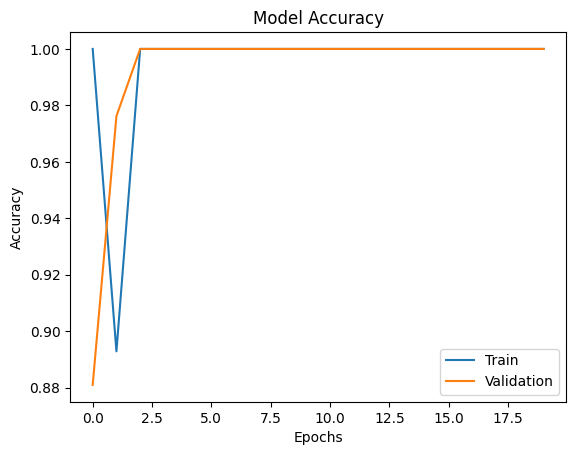

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [29]:
model.save("/content/drive/MyDrive/face.h5")
model_CNN=load_model('/content/drive/MyDrive/face.h5')

1/1 [==============================] - 0s 223ms/step
khôi


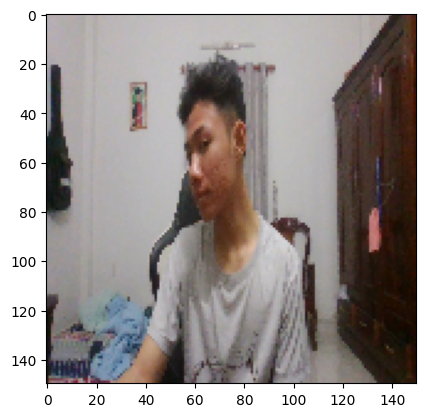

In [41]:

img=load_img("/content/drive/MyDrive/face/Khôi/Khôi1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='Huân'
if round(result[0][1])==1:
  prediction='khôi'
if round(result[0][2])==1:
  prediction='Thắng'
if round(result[0][3])==1:
  prediction='Khan'
print(prediction)

1/1 [==============================] - 0s 21ms/step
Thắng


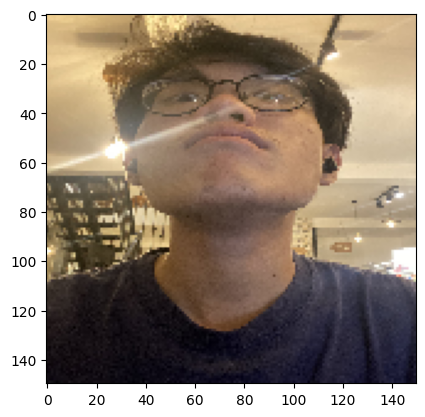

In [42]:
img=load_img("/content/drive/MyDrive/face/Thắng/z4281977142876_9d8dd917a4f790aee23334a333cdfb1b.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='Huân'
if round(result[0][1])==1:
  prediction='khôi'
if round(result[0][2])==1:
  prediction='Thắng'
if round(result[0][3])==1:
  prediction='Khan'
print(prediction)

1/1 [==============================] - 0s 25ms/step
Thắng


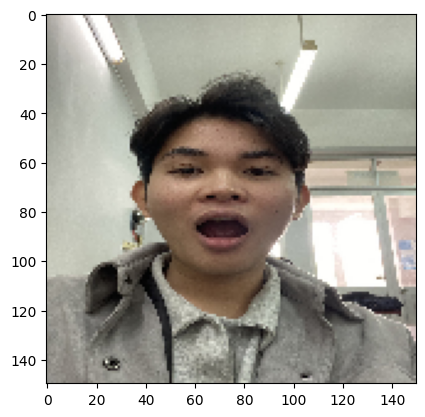

In [43]:
img=load_img("/content/drive/MyDrive/face/khan/z4279499581166_9c7f607968c8bb9b1ea98b72b5ac7968.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='Huân'
if round(result[0][1])==1:
  prediction='khôi'
if round(result[0][2])==1:
  prediction='Thắng'
if round(result[0][3])==1:
  prediction='Khan'
print(prediction)

1/1 [==============================] - 0s 20ms/step
Thắng


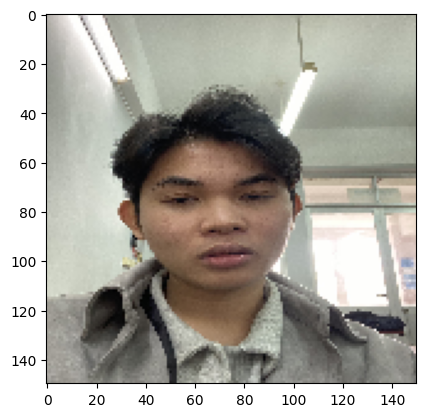

In [45]:
img=load_img("/content/drive/MyDrive/face/khan/z4279499664707_83709753a290f8b1fb1807acab08db1d.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='Huân'
if round(result[0][1])==1:
  prediction='khôi'
if round(result[0][2])==1:
  prediction='Thắng'
if round(result[0][3])==1:
  prediction='Khan'
print(prediction)

1/1 [==============================] - 0s 22ms/step
Thắng


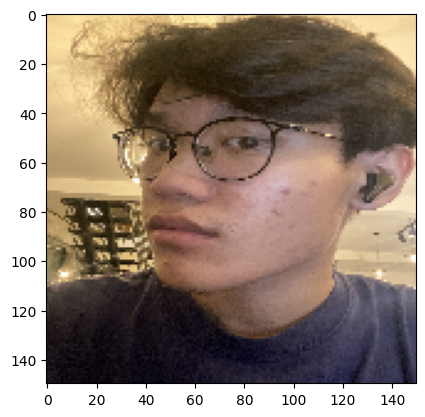

In [46]:
img=load_img("/content/drive/MyDrive/face/Thắng/z4281977145382_070d51dc349e5180b6ef356ea0b9a16b.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='Huân'
if round(result[0][1])==1:
  prediction='khôi'
if round(result[0][2])==1:
  prediction='Thắng'
if round(result[0][3])==1:
  prediction='Khan'
print(prediction)